<a href="https://colab.research.google.com/github/MmeGGy/MOWI/blob/main/MOWI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1: 
Best path = [4, 10, 8, 17, 11, 12, 25, 6, 19, 20, 24, 21, 16, 15, 13, 14, 9, 7, 22, 0, 23, 18, 1, 26, 3, 5, 2, 27], 
Best path length = 409.95016474604927, 
Number of ants = 19


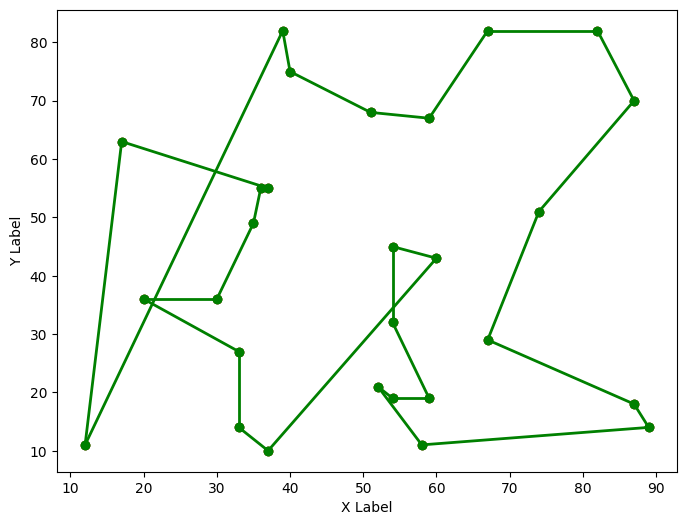

Iteration 2: 
Best path = [25, 12, 11, 10, 4, 8, 17, 6, 7, 9, 14, 15, 16, 13, 21, 19, 20, 24, 0, 22, 27, 18, 1, 23, 26, 5, 3, 2], 
Best path length = 407.8821100049613, 
Number of ants = 16


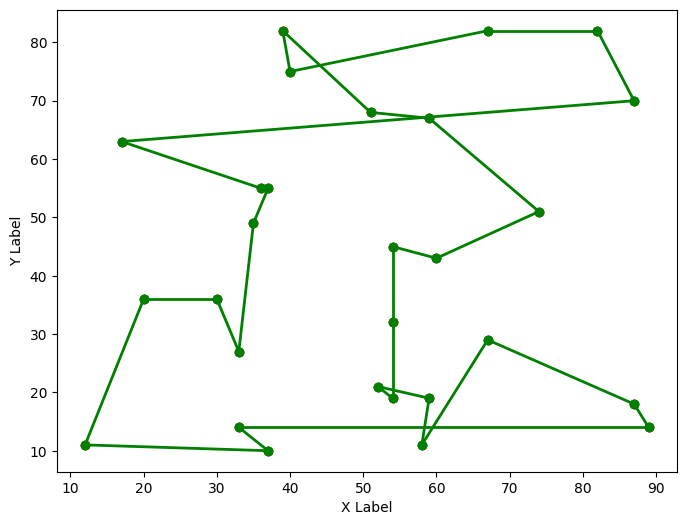

Iteration 3: 
Best path = [25, 12, 11, 6, 7, 9, 14, 19, 20, 24, 16, 15, 13, 21, 0, 22, 27, 2, 18, 1, 23, 3, 5, 26, 17, 8, 10, 4], 
Best path length = 437.82138225462916, 
Number of ants = 9


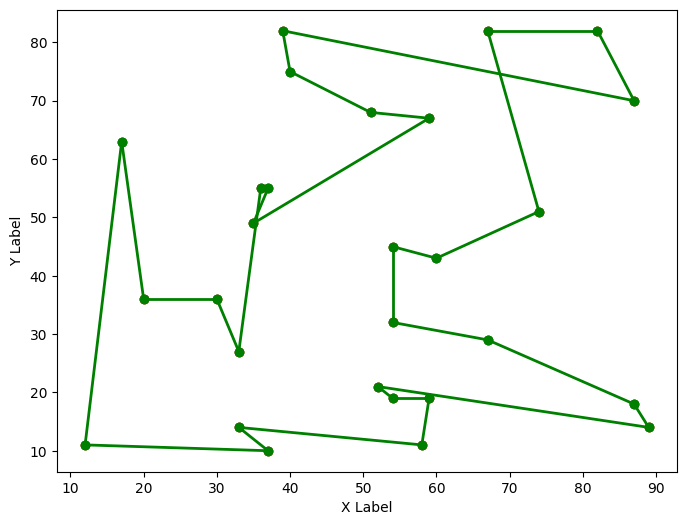

Iteration 4: 
Best path = [24, 20, 19, 21, 13, 15, 16, 22, 0, 27, 23, 1, 18, 2, 4, 10, 8, 17, 11, 12, 25, 6, 7, 9, 14, 26, 3, 5], 
Best path length = 375.127009788907, 
Number of ants = 38


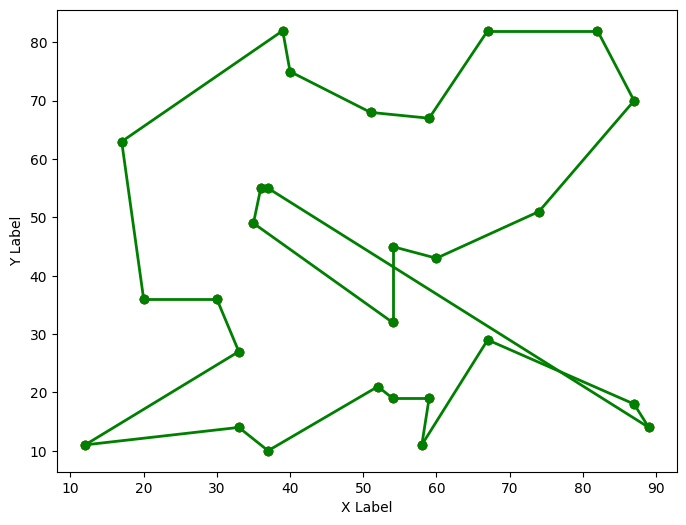

Iteration 5: 
Best path = [17, 8, 10, 4, 11, 12, 25, 6, 7, 9, 14, 19, 20, 24, 21, 13, 16, 15, 26, 3, 5, 2, 18, 1, 27, 22, 0, 23], 
Best path length = 408.3802011009811, 
Number of ants = 14


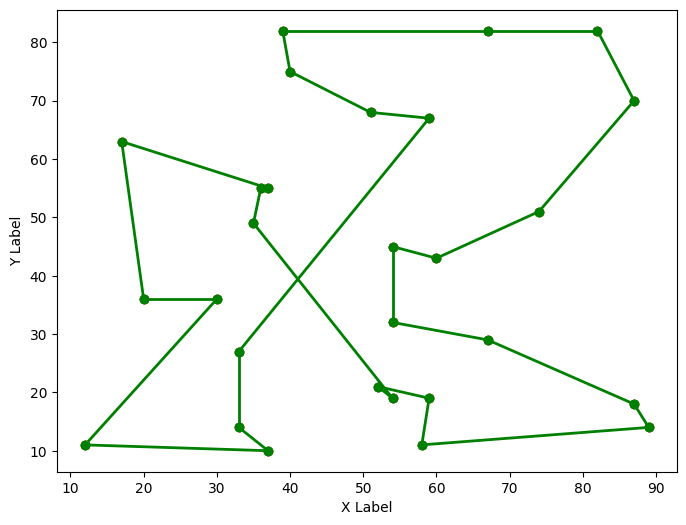

Iteration 6: 
Best path = [27, 22, 0, 23, 1, 18, 26, 3, 5, 2, 10, 4, 8, 17, 11, 12, 25, 6, 7, 9, 14, 16, 15, 13, 21, 24, 20, 19], 
Best path length = 360.1354000781435, 
Number of ants = 49


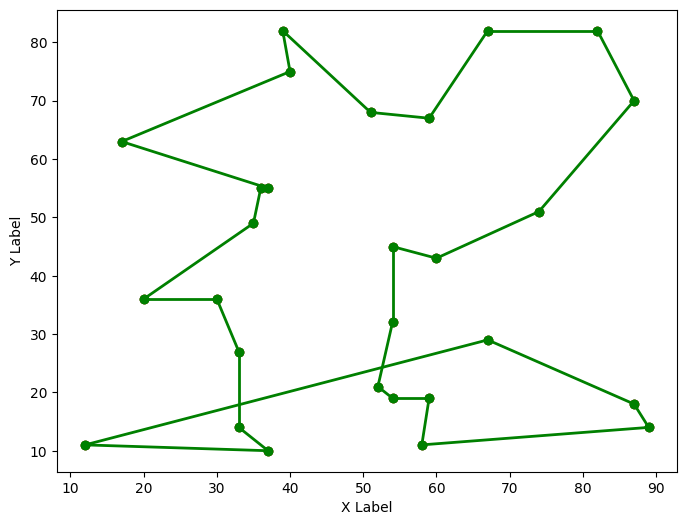

Iteration 7: 
Best path = [27, 18, 2, 4, 10, 8, 17, 12, 11, 25, 7, 6, 9, 14, 19, 24, 20, 21, 13, 15, 16, 22, 0, 23, 1, 26, 3, 5], 
Best path length = 422.54766156178727, 
Number of ants = 18


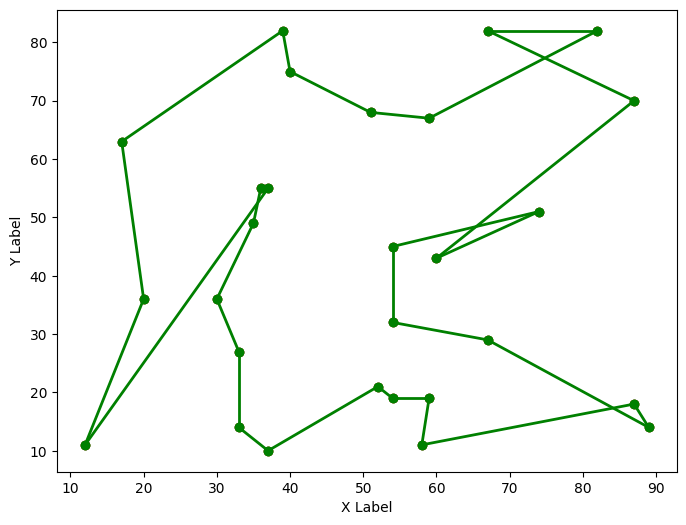

Iteration 8: 
Best path = [27, 18, 1, 23, 0, 22, 21, 13, 16, 15, 14, 19, 24, 20, 6, 17, 8, 10, 4, 11, 12, 25, 7, 9, 5, 3, 26, 2], 
Best path length = 396.7173551932538, 
Number of ants = 36


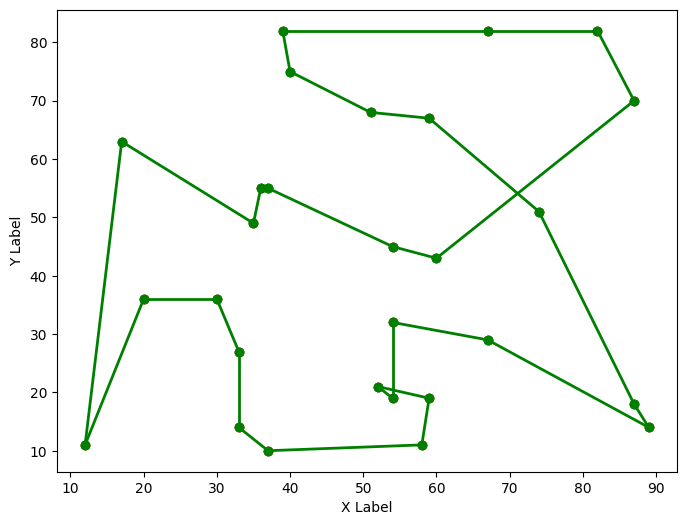

Iteration 9: 
Best path = [20, 24, 21, 13, 15, 16, 22, 0, 27, 23, 1, 18, 2, 26, 3, 5, 10, 4, 8, 17, 11, 12, 25, 6, 9, 7, 14, 19], 
Best path length = 374.8134819935278, 
Number of ants = 41


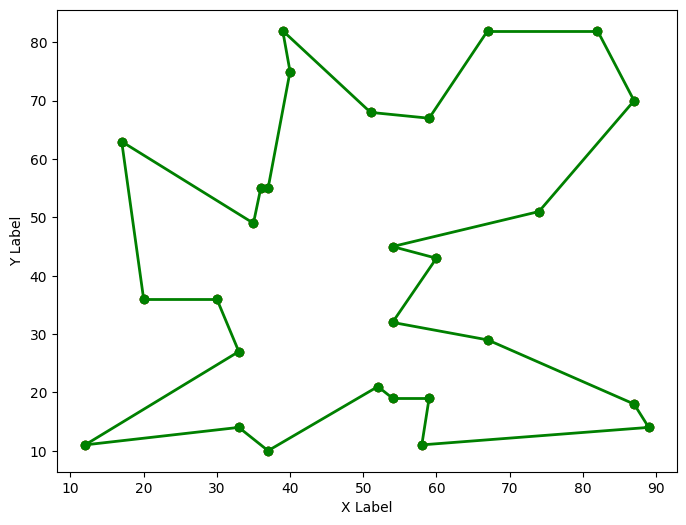

Iteration 10: 
Best path = [24, 20, 19, 13, 21, 16, 15, 0, 22, 23, 1, 18, 3, 5, 26, 2, 4, 10, 8, 17, 11, 12, 25, 6, 9, 7, 14, 27], 
Best path length = 393.773818500493, 
Number of ants = 46


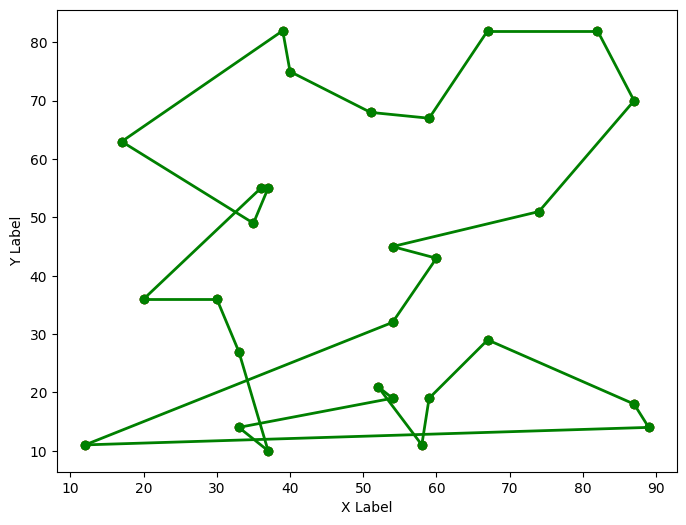

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def ant_colony_optim(points, n_ants, n_iter, alpha, beta, evaporation_rate, Q):
    n_points = len(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = 0

    for iteration in range(n_iter):
        paths = []
        path_lengths = []

        for ant in range(n_ants):
            visited = [False] * n_points
            current_point = np.random.randint(n_points)
            visited[current_point] = True
            path = [current_point]
            path_length = 0

            while False in visited:
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                for i, unvisited_point in enumerate(unvisited):
                    probabilities[i] = pheromone[current_point, unvisited_point] ** alpha / distance(
                        points[current_point], points[unvisited_point])

                probabilities /= np.sum(probabilities)

                next_point = np.random.choice(unvisited, p=probabilities)
                path.append(next_point)
                path_length += distance(points[current_point], points[next_point])
                visited[next_point] = True
                current_point = next_point

            paths.append(path)
            path_lengths.append(path_length)

            if path_length < best_path_length or best_path is None:
                best_path = path
                best_path_length = path_length

        pheromone *= evaporation_rate

        for path, path_length in zip(paths, path_lengths):
            for i in range(n_points - 1):
                pheromone[path[i], path[i + 1]] += Q / path_length
            pheromone[path[-1], path[0]] += Q / path_length

    return best_path, best_path_length

N = np.random.randint(25, 36)
points = np.zeros((N, 2))
for i in range(N):
    points[i, 0] = np.random.randint(10, 91)
    points[i, 1] = np.random.randint(10, 91)

for i in range(10):
    n_ants = np.random.randint(5, 50)
    alpha = np.random.randint(1, 5)
    beta = np.random.randint(1, 5)
    evaporation_rate = np.random.uniform(0.1, 0.9)
    Q = np.random.randint(1, 11)
    best_path, best_path_length = ant_colony_optim(points, n_ants=n_ants, n_iter=100, alpha=alpha, beta=beta,
                                                  evaporation_rate=evaporation_rate, Q=Q)
    print(f"Iteration {i + 1}: \nBest path = {best_path}, \nBest path length = {best_path_length}, \nNumber of ants = {n_ants}")
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], c='r', marker='o')
    for i in range(N - 1):
        plt.plot([points[best_path[i], 0], points[best_path[i + 1], 0]],
                 [points[best_path[i], 1], points[best_path[i + 1], 1]],
                 c='g', linestyle='-', linewidth=2, marker='o')
    plt.plot([points[best_path[0], 0], points[best_path[-1], 0]],
             [points[best_path[0], 1], points[best_path[-1], 1]],
             c='g', linestyle='-', linewidth=2, marker='o')
    plt.xlabel('X Label')
    plt.ylabel('Y Label')
    plt.show()
